<h1 align="center">Web Mining Lab Assignment-10</h1>
                                                                                                                                        <h3 align="right">Aryan Vigyat</h3>
                                                                                                            <h3 align="right"> 20BCE1452</h3>

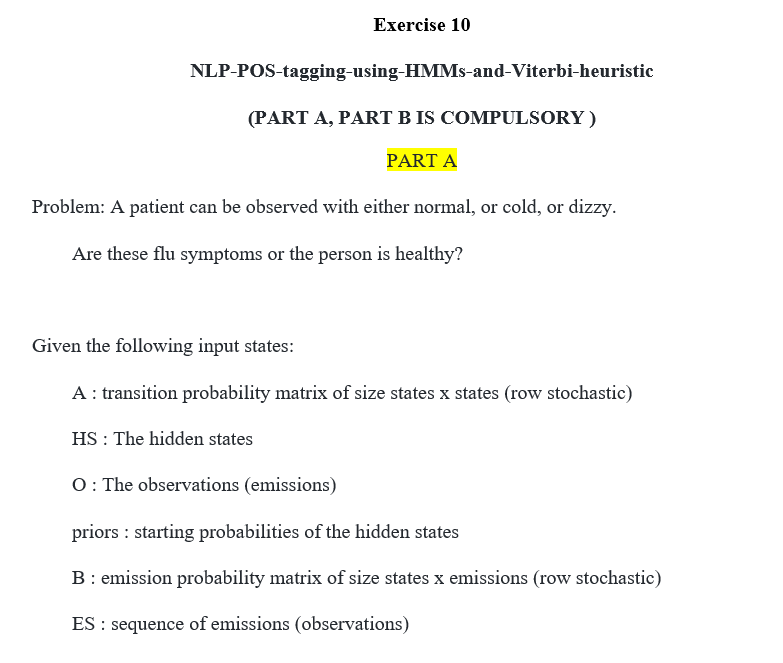
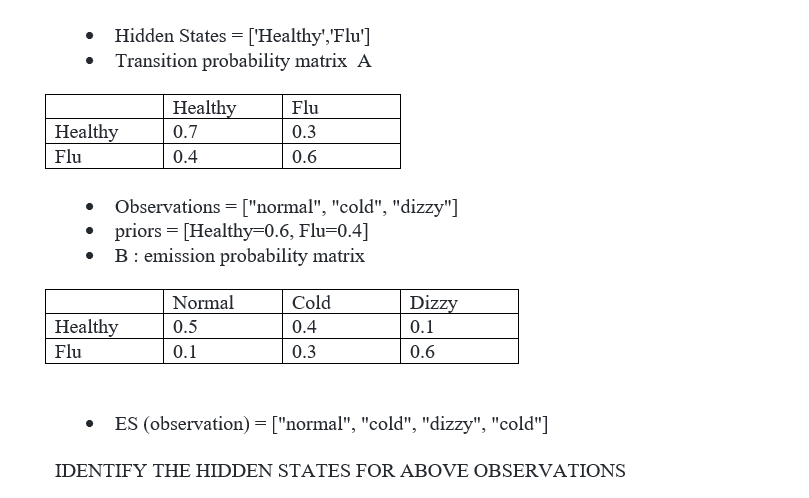

In [ ]:
import numpy as np

# Define the HMM parameters
# The initial state probabilities
pi = np.array([0.6, 0.4])

# The state transition matrix
A = np.array([[0.7, 0.3], [0.4, 0.6]])

# The observation emission matrix
B = np.array([[0.5, 0.4, 0.1], [0.1, 0.3, 0.6]])

# The observation sequence
obs = ["normal", "cold", "dizzy", "cold"]

# Convert the observation sequence to indices
obs_idx = np.array([0, 1, 2, 1])

# Apply the Forward-Backward algorithm to compute the posterior probabilities
# Initialize the forward and backward variables
alpha = np.zeros((len(obs_idx), 2))
beta = np.zeros((len(obs_idx), 2))

# Compute the forward variables
alpha[0] = pi * B[:, obs_idx[0]]
for t in range(1, len(obs_idx)):
    alpha[t] = B[:, obs_idx[t]] * np.dot(alpha[t-1], A)

# Compute the backward variables
beta[-1] = 1
for t in range(len(obs_idx)-2, -1, -1):
    beta[t] = np.dot(A, B[:, obs_idx[t+1]] * beta[t+1])

# Compute the posterior probabilities
gamma = alpha * beta / np.sum(alpha * beta, axis=1, keepdims=True)

# Print the posterior probabilities and the winning hidden state at each stage
print("Posterior probabilities and the winning hidden state:")
for t in range(len(obs_idx)):
    print(f"Observation {obs[t]}: {gamma[t]} -> {'Healthy' if gamma[t][0] > gamma[t][1] else 'Flu'} wins")

Posterior probabilities and the winning hidden state:
Observation normal: [0.87702768 0.12297232] -> Healthy wins
Observation cold: [0.62659477 0.37340523] -> Healthy wins
Observation dizzy: [0.22660368 0.77339632] -> Flu wins
Observation cold: [0.53543508 0.46456492] -> Healthy wins


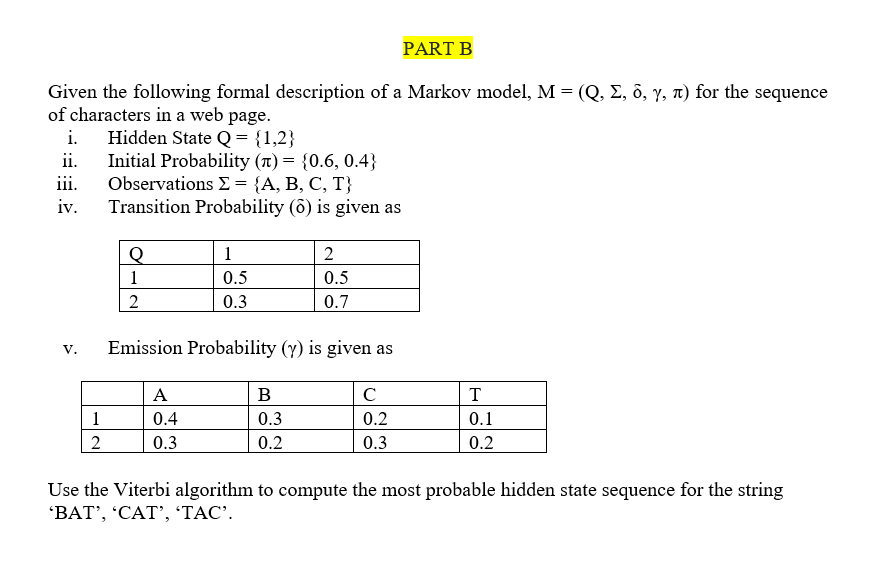

In [ ]:
# Define the transition probabilities
transition_probs = {
    ('H1', 'H1'): 0.5,
    ('H1', 'H2'): 0.5,
    ('H2', 'H1'): 0.3,
    ('H2', 'H2'): 0.7
}

# Define the emission probabilities
emission_probs = {
    ('H1', 'A'): 0.4,
    ('H1', 'B'): 0.3,
    ('H1', 'C'): 0.2,
    ('H1', 'T'): 0.1,
    ('H2', 'A'): 0.3,
    ('H2', 'B'): 0.2,
    ('H2', 'C'): 0.3,
    ('H2', 'T'): 0.2
}

# Define the sequence of observations
observations1 = ['B', 'A', 'T']
observations2 = ['C', 'A', 'T']
observations3 = ['T', 'A', 'C']

# Define the possible states
states = ['H1', 'H2']

# Define the Viterbi algorithm
def viterbi(obs, states, start_probs, trans_probs, emit_probs):
    v = [{}]
    path = {}
    
    # Initialize the first column of viterbi table
    for state in states:
        v[0][state] = start_probs[state] * emit_probs.get((state, obs[0]), 0)
        path[state] = [state]
    
    # Run the Viterbi algorithm for each observation
    for t in range(1, len(obs)):
        v.append({})
        newpath = {}
        
        # Calculate the maximum probability and corresponding path for each state at time t
        for current_state in states:
            (prob, state) = max((v[t-1][previous_state] * trans_probs.get((previous_state, current_state), 0) * 
                                emit_probs.get((current_state, obs[t]), 0), previous_state) 
                               for previous_state in states)
            v[t][current_state] = prob
            newpath[current_state] = path[state] + [current_state]
        
        # Update the path with the new path
        path = newpath
    
    # Find the maximum probability and corresponding path for the final state
    (prob, state) = max((v[len(obs) - 1][final_state], final_state) for final_state in states)
    
    # Return the maximum probability and corresponding path
    return (prob, path[state])

# Define the initial probabilities
start_probs = {
    'H1': 0.6,
    'H2': 0.4
}

# Run the Viterbi algorithm
prob1, path1 = viterbi(observations1, states, start_probs, transition_probs, emission_probs)
prob2, path2 = viterbi(observations2, states, start_probs, transition_probs, emission_probs)
prob3, path3 = viterbi(observations3, states, start_probs, transition_probs, emission_probs)

# Print the results
print("For BAT :")
print("Most likely hidden state sequence: ", path1)
print("Probability of the sequence: ", prob1)

print("For CAT :")
print("Most likely hidden state sequence: ", path2)
print("Probability of the sequence: ", prob2)

print("For TAC :")
print("Most likely hidden state sequence: ", path3)
print("Probability of the sequence: ", prob3)


For BAT :
Most likely hidden state sequence:  ['H1', 'H2', 'H2']
Probability of the sequence:  0.0037800000000000004
For CAT :
Most likely hidden state sequence:  ['H2', 'H2', 'H2']
Probability of the sequence:  0.0035279999999999995
For TAC :
Most likely hidden state sequence:  ['H2', 'H2', 'H2']
Probability of the sequence:  0.0035280000000000003


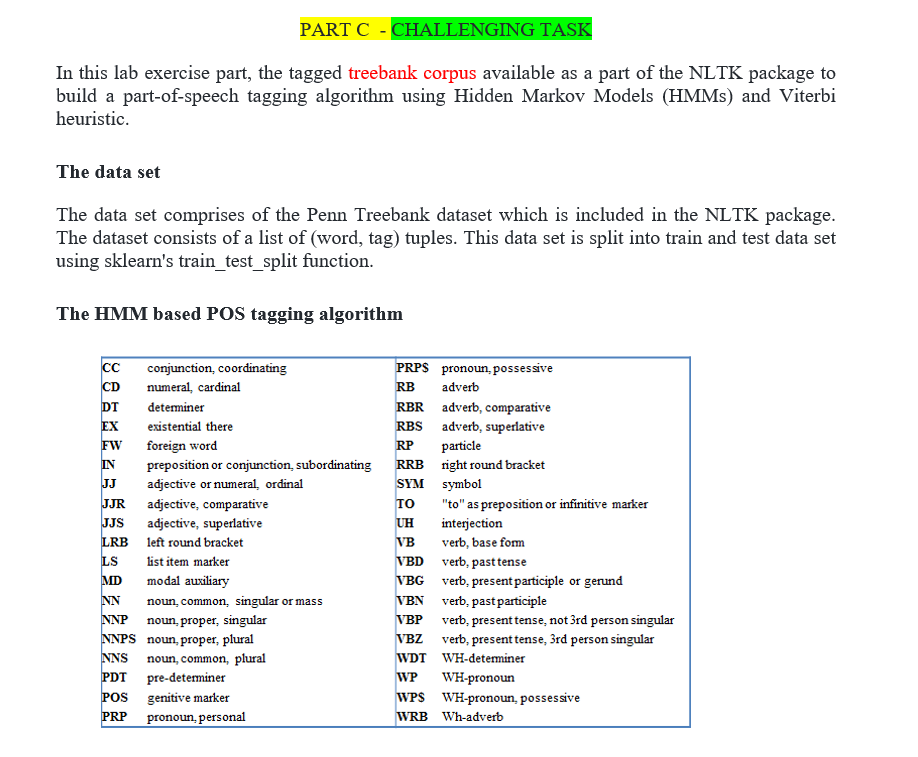

In [ ]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [ ]:
# reading the Treebank tagged sentences
nltk.download('treebank')
wsj = list(nltk.corpus.treebank.tagged_sents())

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [ ]:
# first few tagged sentences
print(wsj[:5])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

In [ ]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.3)

print(len(train_set))
print(len(test_set))
print(train_set[:5])

2739
1175
[[('Atsushi', 'NNP'), ('Muramatsu', 'NNP'), (',', ','), ('executive', 'JJ'), ('vice', 'NN'), ('president', 'NN'), ('and', 'CC'), ('chief', 'NN'), ('financial', 'JJ'), ('officer', 'NN'), ('of', 'IN'), ('Nissan', 'NNP'), (',', ','), ('said', 'VBD'), (',', ','), ('``', '``'), ('The', 'DT'), ('company', 'NN'), ('has', 'VBZ'), ('experienced', 'VBN'), ('a', 'DT'), ('remarkable', 'JJ'), ('turnaround', 'NN'), ('in', 'IN'), ('terms', 'NNS'), ('of', 'IN'), ('profitability', 'NN'), ('since', 'IN'), ('the', 'DT'), ('fiscal', 'JJ'), ('year', 'NN'), ('ending', 'VBG'), ('March', 'NNP'), ('1987', 'CD'), (',', ','), ('when', 'WRB'), ('the', 'DT'), ('sharp', 'JJ'), ('and', 'CC'), ('rapid', 'JJ'), ('appreciation', 'NN'), ('of', 'IN'), ('the', 'DT'), ('yen', 'NN'), ('caused', 'VBD'), ('many', 'JJ'), ('difficulties', 'NNS'), ('*T*-1', '-NONE-'), ('.', '.')], [('A', 'DT'), ('more', 'RBR'), ('recent', 'JJ'), ('novel', 'NN'), (',', ','), ('``', '``'), ('Norwegian', 'NNP'), ('Wood', 'NNP'), ("''", "'

In [ ]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

71004

In [ ]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Atsushi',
 'Muramatsu',
 ',',
 'executive',
 'vice',
 'president',
 'and',
 'chief',
 'financial',
 'officer']

In [ ]:
# vocabulary
V = set(tokens)
print(len(V))

10279


In [ ]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

46

In [ ]:
print(T)

{'POS', '``', '.', 'JJ', 'PRP$', '$', ':', 'CD', 'RB', 'WP', 'RBR', ',', 'TO', '-LRB-', 'VBN', 'NNS', 'WP$', 'JJS', 'RP', 'PRP', 'VBD', '-NONE-', '#', 'MD', 'NNPS', 'VBG', 'UH', 'RBS', 'FW', 'NNP', 'LS', 'VBZ', "''", 'IN', 'VBP', 'DT', 'PDT', 'JJR', '-RRB-', 'SYM', 'CC', 'NN', 'WRB', 'VB', 'WDT', 'EX'}


In [ ]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [ ]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [ ]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [ ]:
tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [ ]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [ ]:
tags_df

,POS,``,.,JJ,PRP$,$,:,CD,RB,WP,...,PDT,JJR,-RRB-,SYM,CC,NN,WRB,VB,WDT,EX
POS,0.000000,0.005245,0.006993,0.192308,0.000000,0.006993,0.000000,0.022727,0.006993,0.001748,...,0.000000,0.001748,0.001748,0.00000,0.005245,0.424825,0.000000,0.000000,0.000000,0.000000
``,0.000000,0.000000,0.000000,0.114583,0.006250,0.000000,0.000000,0.002083,0.077083,0.008333,...,0.000000,0.000000,0.000000,0.00000,0.022917,0.089583,0.010417,0.010417,0.000000,0.016667
.,0.000000,0.062823,0.000000,0.033259,0.007391,0.001109,0.002956,0.007391,0.042868,0.004435,...,0.000370,0.001848,0.003326,0.00000,0.052476,0.043607,0.005913,0.001109,0.000739,0.004804
JJ,0.000000,0.002399,0.022547,0.065243,0.000000,0.001679,0.003118,0.020149,0.002399,0.000240,...,0.000000,0.000240,0.000240,0.00000,0.015591,0.443991,0.000720,0.000000,0.000000,0.000000
PRP$,0.000000,0.000000,0.000000,0.231330,0.000000,0.010929,0.000000,0.030965,0.000000,0.000000,...,0.000000,0.003643,0.000000,0.00000,0.000000,0.411658,0.000000,0.000000,0.000000,0.000000
$,0.000000,0.000000,0.000000,0.009579,0.000000,0.000000,0.000000,0.990421,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
:,0.000000,0.053864,0.011710,0.067916,0.000000,0.007026,0.000000,0.112412,0.035129,0.014052,...,0.000000,0.002342,0.000000,0.00000,0.056206,0.025761,0.007026,0.000000,0.004684,0.002342
CD,0.000397,0.000000,0.046844,0.029377,0.000000,0.000000,0.003970,0.187773,0.001985,0.000397,...,0.000000,0.001191,0.000794,0.00000,0.011116,0.198491,0.000000,0.000000,0.001588,0.000000
RB,0.000000,0.002024,0.040992,0.092105,0.001012,0.007591,0.006579,0.034413,0.069838,0.001012,...,0.000506,0.019231,0.000000,0.00000,0.008097,0.012652,0.002024,0.102227,0.001012,0.001012
WP,0.000000,0.000000,0.000000,0.005618,0.016854,0.000000,0.000000,0.005618,0.016854,0.000000,...,0.005618,0.000000,0.000000,0.00000,0.000000,0.016854,0.000000,0.000000,0.000000,0.000000


In [ ]:
tags_df.loc['.', :]

POS       0.000000
``        0.062823
.         0.000000
JJ        0.033259
PRP$      0.007391
$         0.001109
:         0.002956
CD        0.007391
RB        0.042868
WP        0.004435
RBR       0.000370
,         0.000000
TO        0.001109
-LRB-     0.004065
VBN       0.001478
NNS       0.039542
WP$       0.000000
JJS       0.001478
RP        0.000000
PRP       0.061345
VBD       0.000739
-NONE-    0.019956
#         0.000000
MD        0.000370
NNPS      0.001478
VBG       0.002956
UH        0.000370
RBS       0.000370
FW        0.000000
NNP       0.187361
LS        0.002217
VBZ       0.002587
''        0.061715
IN        0.117517
VBP       0.000000
DT        0.216186
PDT       0.000370
JJR       0.001848
-RRB-     0.003326
SYM       0.000000
CC        0.052476
NN        0.043607
WRB       0.005913
VB        0.001109
WDT       0.000739
EX        0.004804
Name: ., dtype: float32

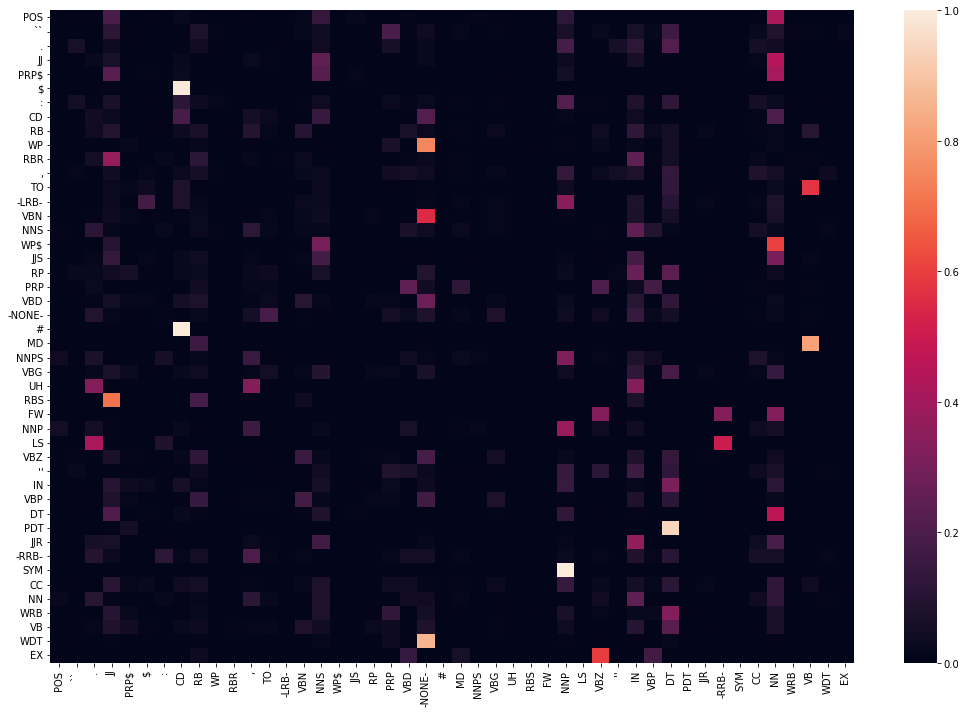

In [ ]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

VITERBI ALGORITHM

In [ ]:
len(train_tagged_words)

71004

In [ ]:
#Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
# Running the Viterbi algorithm on a few sample sentences
# since running it on the entire data set will take many hours

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('Even', 'RB'),
  ('with', 'IN'),
  ('mutual', 'JJ'),
  ('funds', 'NNS'),
  (',', ','),
  ('the', 'DT'),
  ('little', 'JJ'),
  ('investor', 'NN'),
  ('continues', 'VBZ'),
  ('*-1', '-NONE-'),
  ('to', 'TO'),
  ('tolerate', 'VB'),
  ('high', 'JJ'),
  ('fees', 'NNS'),
  (',', ','),
  ('high', 'JJ'),
  ('commissions', 'NNS'),
  ('and', 'CC'),
  ('poor', 'JJ'),
  ('performance', 'NN'),
  (',', ','),
  ('while', 'IN'),
  ('index-fund', 'NN'),
  ('managers', 'NNS'),
  ('slowly', 'RB'),
  ('amass', 'VBP'),
  ('a', 'DT'),
  ('better', 'JJR'),
  ('record', 'NN'),
  ('with', 'IN'),
  ('lower', 'JJR'),
  ('fees', 'NNS'),
  (',', ','),
  ('lower', 'JJR'),
  ('commissions', 'NNS'),
  ('and', 'CC'),
  ('less', 'JJR'),
  ('risk', 'NN'),
  ('.', '.')],
 [('An', 'DT'),
  ('entirely', 'RB'),
  ('new', 'JJ'),
  ('band', 'NN'),
  ('*ICH*-2', '-NONE-'),
  ('rings', 'VBZ'),
  ('today', 'NN'),
  ('at', 'IN'),
  ('Great', 'JJ'),
  ('Torrington', 'NNP'),
  (',', ','),
  ('several', 'JJ'),
  ('of', 'IN'),
  (

In [ ]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [ ]:
print("Time taken in seconds: ", difference)
print(tagged_seq)

Time taken in seconds:  72.95203304290771
[('Even', 'RB'), ('with', 'IN'), ('mutual', 'JJ'), ('funds', 'NNS'), (',', ','), ('the', 'DT'), ('little', 'JJ'), ('investor', 'NN'), ('continues', 'VBZ'), ('*-1', '-NONE-'), ('to', 'TO'), ('tolerate', 'POS'), ('high', 'JJ'), ('fees', 'NNS'), (',', ','), ('high', 'JJ'), ('commissions', 'NNS'), ('and', 'CC'), ('poor', 'JJ'), ('performance', 'NN'), (',', ','), ('while', 'IN'), ('index-fund', 'JJ'), ('managers', 'NNS'), ('slowly', 'RB'), ('amass', 'POS'), ('a', 'JJ'), ('better', 'RBR'), ('record', 'JJ'), ('with', 'IN'), ('lower', 'JJR'), ('fees', 'NNS'), (',', ','), ('lower', 'JJR'), ('commissions', 'NNS'), ('and', 'CC'), ('less', 'JJR'), ('risk', 'NN'), ('.', '.'), ('An', 'DT'), ('entirely', 'RB'), ('new', 'JJ'), ('band', 'NN'), ('*ICH*-2', '-NONE-'), ('rings', 'NNS'), ('today', 'NN'), ('at', 'IN'), ('Great', 'NNP'), ('Torrington', 'NNP'), (',', ','), ('several', 'JJ'), ('of', 'IN'), ('whom', 'WP'), ('*T*-1', '-NONE-'), ('are', 'VBP'), ('members'

In [ ]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [ ]:
accuracy = len(check)/len(tagged_seq)
accuracy

0.8018018018018018

In [ ]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [ ]:
incorrect_tagged_cases

[[('to', 'TO'), (('tolerate', 'POS'), ('tolerate', 'VB'))],
 [('while', 'IN'), (('index-fund', 'JJ'), ('index-fund', 'NN'))],
 [('slowly', 'RB'), (('amass', 'POS'), ('amass', 'VBP'))],
 [('amass', 'VBP'), (('a', 'JJ'), ('a', 'DT'))],
 [('a', 'DT'), (('better', 'RBR'), ('better', 'JJR'))],
 [('better', 'JJR'), (('record', 'JJ'), ('record', 'NN'))],
 [('*ICH*-2', '-NONE-'), (('rings', 'NNS'), ('rings', 'VBZ'))],
 [('at', 'IN'), (('Great', 'NNP'), ('Great', 'JJ'))],
 [('.', '.'), (('Continuing', 'POS'), ('Continuing', 'VBG'))],
 [('who', 'WP'), (('*T*-58', 'POS'), ('*T*-58', '-NONE-'))],
 [('*T*-58', '-NONE-'), (('chooses', 'POS'), ('chooses', 'VBZ'))],
 [('chooses', 'VBZ'), (('*-1', 'POS'), ('*-1', '-NONE-'))],
 [('*-1', '-NONE-'), (('to', 'JJ'), ('to', 'TO'))],
 [('to', 'TO'), (('fly', 'POS'), ('fly', 'VB'))],
 [('fly', 'VB'), (('to', 'JJ'), ('to', 'TO'))],
 [('to', 'TO'), (('his', 'POS'), ('his', 'PRP$'))],
 [('his', 'PRP$'), (('destination', 'POS'), ('destination', 'NN'))],
 [('destin

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)
start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

In [ ]:
print(tagged_seq)
print(difference)

[('Twitter', 'POS'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'NN'), ('social', 'JJ'), ('site', 'POS'), ('.', '.'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', 'POS'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('emerging', 'VBG'), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]
17.10874605178833
